In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np

In [2]:
def NOT(input):

    q = QuantumRegister(1) # a qubit in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if input=='1':
        qc.x( q[0] )
        
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x( q[0] )
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure( q[0], c[0] )
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1)
    output = next(iter(job.result().get_counts()))
    
    return output

In [3]:
print('\nResults for the NOT gate')
for input in ['0','1']:
    print('    Input',input,'gives output',NOT(input))


Results for the NOT gate
    Input 0 gives output 1
    Input 1 gives output 0


In [4]:
def XOR(input1, input2):
    q = QuantumRegister(2) # two qubits in which to encode and manipulate the input
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    if input1 != input2:
        qc.x(q[0])

    # YOUR QUANTUM PROGRAM GOES HERE
    qc.cx(q[0], q[1])
    qc.measure(q[1], c[0])# YOU CAN CHANGE THIS IF YOU WANT TO 
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc, backend, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [5]:
print('\nResults for the XOR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('Inputs', input1, input2, 'give output', XOR(input1,input2))


Results for the XOR gate
Inputs 0 0 give output 0
Inputs 0 1 give output 1
Inputs 1 0 give output 1
Inputs 1 1 give output 0


In [12]:
def AND(input1,input2):
    
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    qc.ccx(q[0], q[1], q[2])
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [13]:
print('\nResults for the AND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',AND(input1,input2))


Results for the AND gate
    Inputs 0 0 give output 0
    Inputs 0 1 give output 0
    Inputs 1 0 give output 0
    Inputs 1 1 give output 1


In [20]:
def NAND(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    qc.ccx(q[0], q[1], q[2])
    qc.x(q[2])
    qc.measure(q[2],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO

    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [21]:
print('\nResults for the NAND gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',NAND(input1,input2))


Results for the NAND gate
    Inputs 0 0 give output 1
    Inputs 0 1 give output 1
    Inputs 1 0 give output 1
    Inputs 1 1 give output 0


In [64]:
def OR(input1,input2):
  
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    if not ((input1 == '1') & (input2 == '1')):
        qc.cx(q[0], q[1])
#     qc.measure(q[2],c[0]) # original
    qc.measure(q[1],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    
    return output

In [65]:
print('\nResults for the OR gate')
for input1 in ['0','1']:
    for input2 in ['0','1']:
        print('    Inputs',input1,input2,'give output',OR(input1,input2))


Results for the OR gate
    Inputs 0 0 give output 0
    Inputs 0 1 give output 1
    Inputs 1 0 give output 1
    Inputs 1 1 give output 1


In [62]:
def draw_and_run(input1, input2):
    q = QuantumRegister(3) # two qubits in which to encode the input, and one for the output
    c = ClassicalRegister(1) # a bit to store the output
    qc = QuantumCircuit(q, c) # this is where the quantum program goes
    
    # YOUR QUANTUM PROGRAM GOES HERE
    if input1 == '1':
        qc.x(q[0])
    if input2 == '1':
        qc.x(q[1])
    if not ((input1 == '1') & (input2 == '1')):
        qc.cx(q[0], q[1])
    qc.measure(q[1],c[0]) # YOU CAN CHANGE THIS IF YOU WANT TO
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('qasm_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = execute(qc,backend,shots=1,memory=True)
    output = job.result().get_memory()[0]
    print("output = ", output)
    return qc.draw(output='mpl')

output =  1


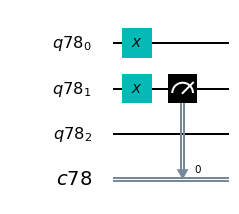

In [63]:
draw_and_run('1', '1')